# Metabolic Syndrome Prediction

### Importing Libraries

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as smi
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_squared_error
from sklearn.metrics import classification_report
from tabulate import tabulate
from sklearn.metrics import confusion_matrix
import warnings

warnings.simplefilter('ignore')

### Data Preprocesing

In [61]:
df = pd.read_csv(r'C:/Users/PC/Desktop/ML/Data/Metabolic Syndrome.csv')
df.head(5)

,seqn,Age,Sex,Marital,Income,Race,WaistCirc,BMI,Albuminuria,UrAlbCr,UricAcid,BloodGlucose,HDL,Triglycerides,MetabolicSyndrome
0,62161,22,Male,Single,8200.0,White,81.0,23.3,0,3.88,4.9,92,41,84,0
1,62164,44,Female,Married,4500.0,White,80.1,23.2,0,8.55,4.5,82,28,56,0
2,62169,21,Male,Single,800.0,Asian,69.6,20.1,0,5.07,5.4,107,43,78,0
3,62172,43,Female,Single,2000.0,Black,120.4,33.3,0,5.22,5.0,104,73,141,0
4,62177,51,Male,Married,NaN,Asian,81.1,20.1,0,8.13,5.0,95,43,126,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2401 entries, 0 to 2400
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   seqn               2401 non-null   int64  
 1   Age                2401 non-null   int64  
 2   Sex                2401 non-null   object 
 3   Marital            2193 non-null   object 
 4   Income             2284 non-null   float64
 5   Race               2401 non-null   object 
 6   WaistCirc          2316 non-null   float64
 7   BMI                2375 non-null   float64
 8   Albuminuria        2401 non-null   int64  
 9   UrAlbCr            2401 non-null   float64
 10  UricAcid           2401 non-null   float64
 11  BloodGlucose       2401 non-null   int64  
 12  HDL                2401 non-null   int64  
 13  Triglycerides      2401 non-null   int64  
 14  MetabolicSyndrome  2401 non-null   int64  
dtypes: float64(5), int64(7), object(3)
memory usage: 281.5+ KB


In [5]:
df.describe()

,seqn,Age,Income,WaistCirc,BMI,Albuminuria,UrAlbCr,UricAcid,BloodGlucose,HDL,Triglycerides,MetabolicSyndrome
count,2401.000000,2401.000000,2284.000000,2316.000000,2375.000000,2401.000000,2401.000000,2401.000000,2401.000000,2401.000000,2401.000000,2401.000000
mean,67030.674302,48.691795,4005.253940,98.307254,28.702189,0.154102,43.626131,5.489046,108.247813,53.369429,128.125364,0.342357
std,2823.565114,17.632852,2954.032186,16.252634,6.662242,0.422780,258.272829,1.439358,34.820657,15.185537,95.322477,0.474597
min,62161.000000,20.000000,300.000000,56.200000,13.400000,0.000000,1.400000,1.800000,39.000000,14.000000,26.000000,0.000000
25%,64591.000000,34.000000,1600.000000,86.675000,24.000000,0.000000,4.450000,4.500000,92.000000,43.000000,75.000000,0.000000
50%,67059.000000,48.000000,2500.000000,97.000000,27.700000,0.000000,7.070000,5.400000,99.000000,51.000000,103.000000,0.000000
75%,69495.000000,63.000000,6200.000000,107.625000,32.100000,0.000000,13.690000,6.400000,110.000000,62.000000,150.000000,1.000000
max,71915.000000,80.000000,9000.000000,176.000000,68.700000,2.000000,5928.000000,11.300000,382.000000,156.000000,1562.000000,1.000000


In [6]:
df.mean()

seqn                 67030.674302
Age                     48.691795
Income                4005.253940
WaistCirc               98.307254
BMI                     28.702189
Albuminuria              0.154102
UrAlbCr                 43.626131
UricAcid                 5.489046
BloodGlucose           108.247813
HDL                     53.369429
Triglycerides          128.125364
MetabolicSyndrome        0.342357
dtype: float64

In [7]:
df.median()

seqn                 67059.00
Age                     48.00
Income                2500.00
WaistCirc               97.00
BMI                     27.70
Albuminuria              0.00
UrAlbCr                  7.07
UricAcid                 5.40
BloodGlucose            99.00
HDL                     51.00
Triglycerides          103.00
MetabolicSyndrome        0.00
dtype: float64

In [8]:
df.skew()

seqn                 -0.009308
Age                   0.134018
Income                0.613143
WaistCirc             0.634634
BMI                   1.122344
Albuminuria           2.819277
UrAlbCr              13.291163
UricAcid              0.471024
BloodGlucose          3.766413
HDL                   1.082828
Triglycerides         4.462779
MetabolicSyndrome     0.664876
dtype: float64

In [62]:
df.isnull().sum()

seqn                   0
Age                    0
Sex                    0
Marital              208
Income               117
Race                   0
WaistCirc             85
BMI                   26
Albuminuria            0
UrAlbCr                0
UricAcid               0
BloodGlucose           0
HDL                    0
Triglycerides          0
MetabolicSyndrome      0
dtype: int64

In [63]:
df = df.dropna()

In [64]:
df.columns

Index(['seqn', 'Age', 'Sex', 'Marital', 'Income', 'Race', 'WaistCirc', 'BMI',
       'Albuminuria', 'UrAlbCr', 'UricAcid', 'BloodGlucose', 'HDL',
       'Triglycerides', 'MetabolicSyndrome'],
      dtype='object')

In [65]:
df.shape

(2009, 15)

### Exploratory Data Analysis

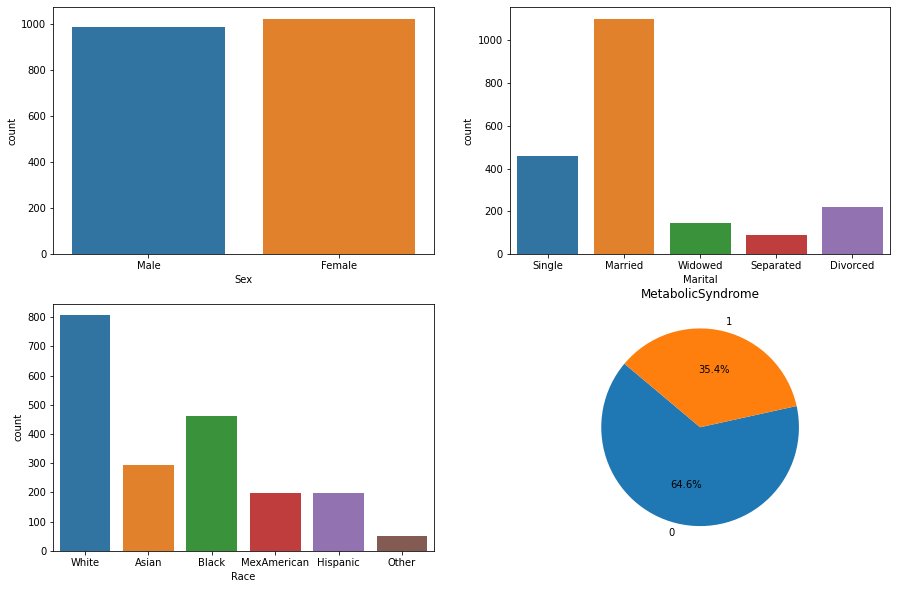

In [66]:
fig, ax = plt.subplots(2, 2, figsize=(15, 10))

sns.countplot(data = df, x ='Sex', ax=ax[0,0])
sns.countplot(data = df, x ='Marital', ax=ax[0,1])
sns.countplot(data = df, x ='Race', ax=ax[1,0])
ax[1,1].pie(df['MetabolicSyndrome'].value_counts(), labels=df['MetabolicSyndrome'].value_counts().index, autopct='%1.1f%%', startangle=140)
ax[1,1].set_title('MetabolicSyndrome')

plt.show()

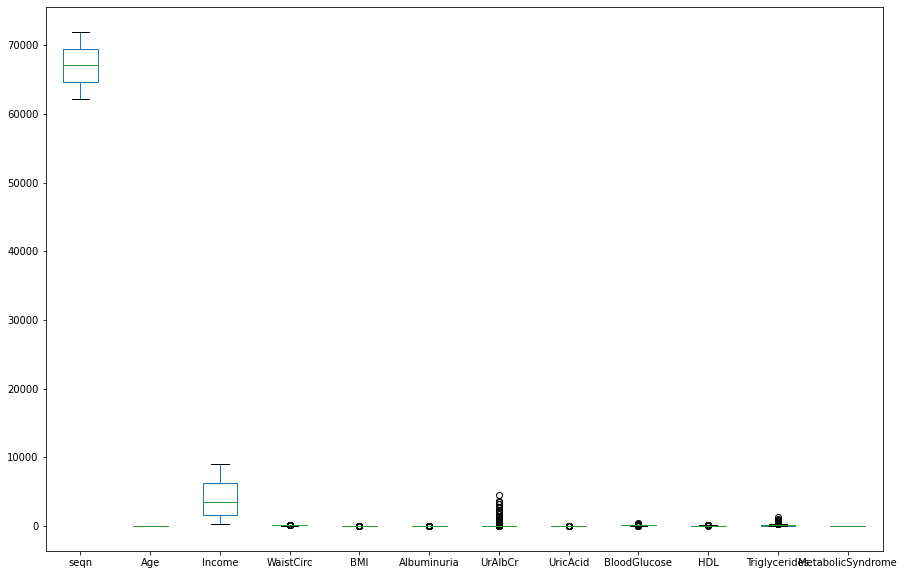

In [67]:
df.boxplot(figsize = (15,10), grid = False)
plt.show()

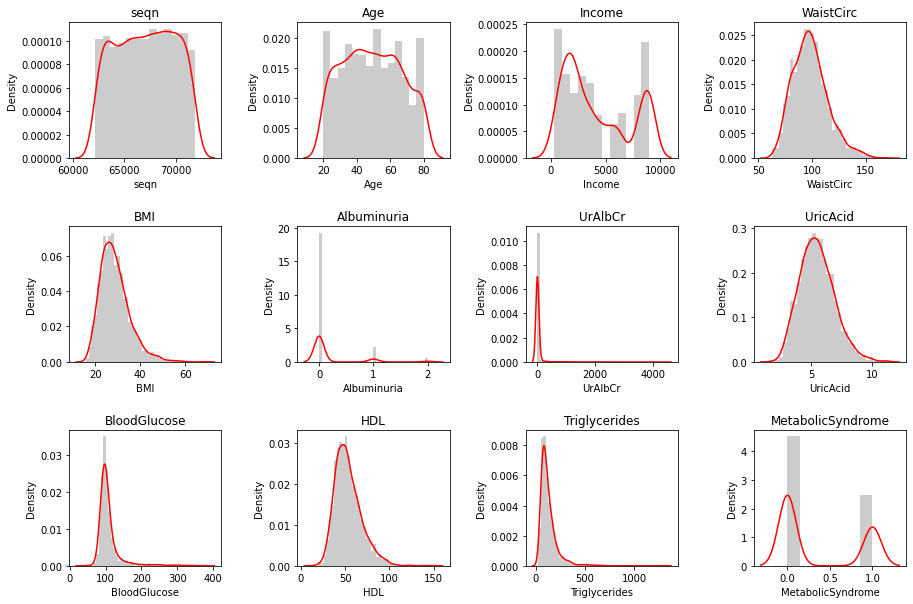

In [68]:
columnas_por_fila = 4

num_columnas = len(df.describe().columns)
num_filas = -(-num_columnas // columnas_por_fila)  

fig, ax = plt.subplots(num_filas, columnas_por_fila, figsize=(15, 10))

plt.subplots_adjust(wspace=0.5, hspace=0.5)
for i, columna in enumerate(df.describe().columns):
    fila_actual = i // columnas_por_fila
    columna_actual = i % columnas_por_fila
    
    sns.distplot(df[columna], ax=ax[fila_actual, columna_actual], color='red', hist_kws={'color': 'gray'})
    ax[fila_actual, columna_actual].set_title(columna)
plt.show()

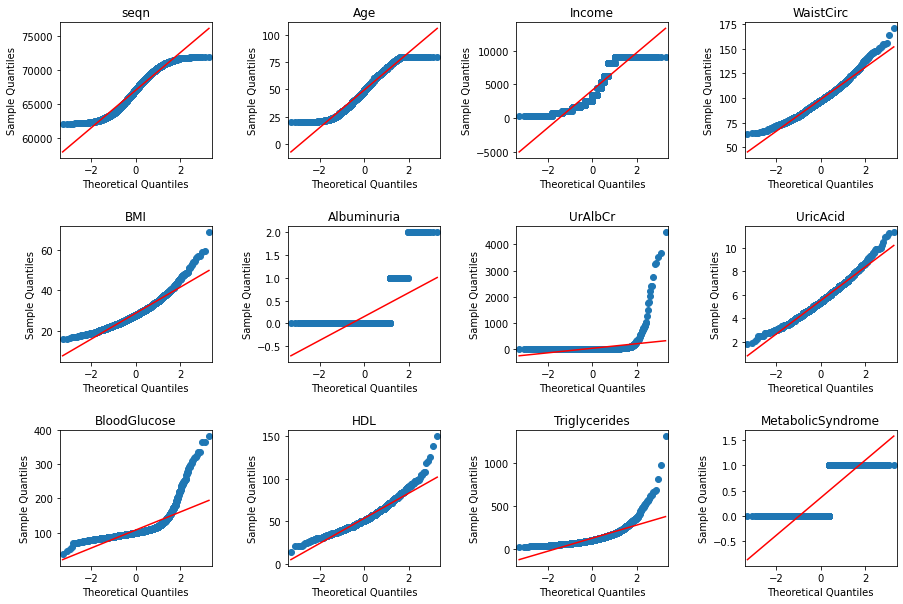

In [69]:
columnas_por_fila = 4

num_columnas = len(df.describe().columns)
num_filas = -(-num_columnas // columnas_por_fila)  

fig, ax = plt.subplots(num_filas, columnas_por_fila, figsize=(15, 10))

plt.subplots_adjust(wspace=0.5, hspace=0.5)
for i, columna in enumerate(df.describe().columns):
    fila_actual = i // columnas_por_fila
    columna_actual = i % columnas_por_fila
    
    smi.qqplot(df[columna], ax=ax[fila_actual, columna_actual],line="r")
    ax[fila_actual, columna_actual].set_title(columna)
plt.show()

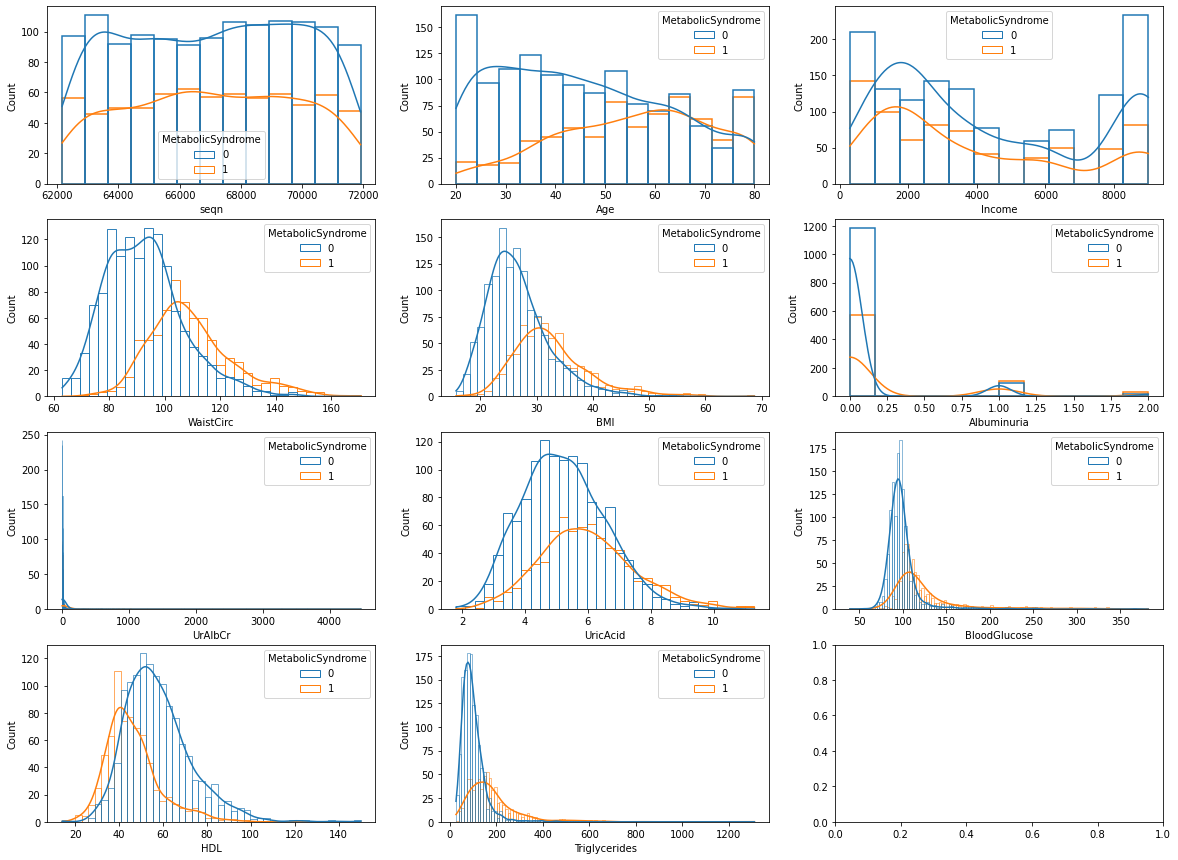

In [70]:
fig, ax = plt.subplots(4, 3, figsize=(20, 15))

sns.histplot(data = df, x = 'seqn',ax=ax[0,0], hue='MetabolicSyndrome',fill=False, kde=True)
sns.histplot(data =df, x = 'Age',ax=ax[0,1],  hue='MetabolicSyndrome',fill=False, kde=True)
sns.histplot(data =df, x = 'Income',ax=ax[0,2],  hue='MetabolicSyndrome',fill=False, kde=True)
sns.histplot(data =df, x = 'WaistCirc',ax=ax[1,0], hue='MetabolicSyndrome',fill=False, kde=True)
sns.histplot(data =df, x = 'BMI',ax=ax[1,1],   hue='MetabolicSyndrome',fill=False, kde=True)
sns.histplot(data =df, x = 'Albuminuria',ax=ax[1,2],   hue='MetabolicSyndrome',fill=False, kde=True)
sns.histplot(data =df, x = 'UrAlbCr',ax=ax[2,0],  hue='MetabolicSyndrome',fill=False, kde=True)
sns.histplot(data =df, x = 'UricAcid',ax=ax[2,1],   hue='MetabolicSyndrome',fill=False, kde=True)
sns.histplot(data =df, x = 'BloodGlucose',ax=ax[2,2], hue='MetabolicSyndrome',fill=False, kde=True)
sns.histplot(data =df, x = 'HDL',ax=ax[3,0],   hue='MetabolicSyndrome',fill=False, kde=True)
sns.histplot(data =df, x = 'Triglycerides',ax=ax[3,1],  hue='MetabolicSyndrome',fill=False, kde=True)

plt.show()

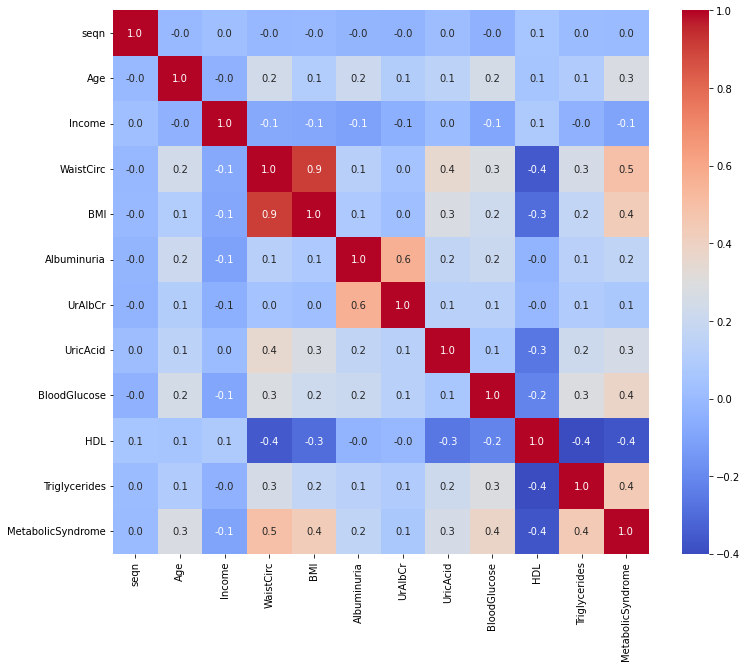

In [71]:
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(), annot = True, fmt = '.1f', cmap = 'coolwarm')
plt.show()

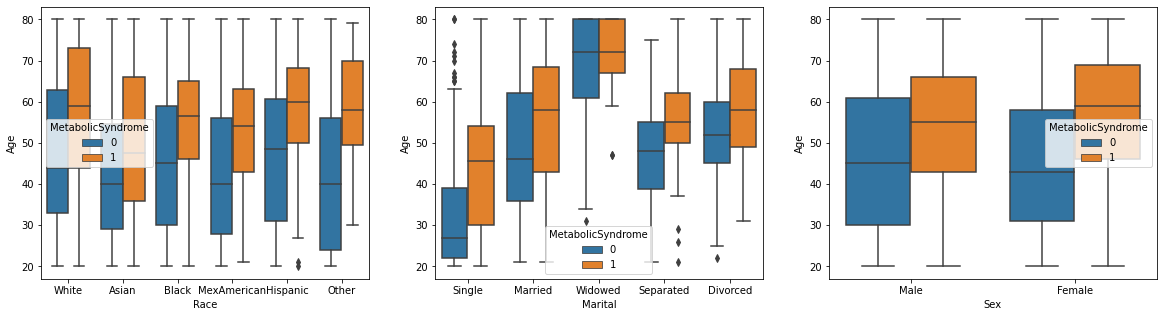

In [72]:
fig, ax = plt.subplots(1, 3, figsize=(20, 5))

sns.boxplot(data = df, x ='Race', y='Age', hue = 'MetabolicSyndrome',ax=ax[0])
sns.boxplot(data = df, x ='Marital', y='Age', hue = 'MetabolicSyndrome',ax=ax[1])
sns.boxplot(data = df, x ='Sex', y='Age', hue = 'MetabolicSyndrome',ax=ax[2])

plt.show()

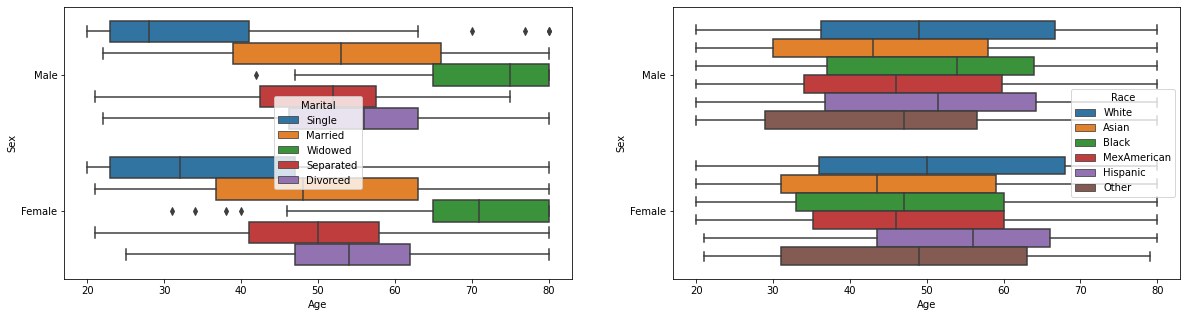

In [73]:
fig, ax = plt.subplots(1, 2, figsize=(20, 5))

sns.boxplot(data = df, x ='Age', y='Sex', hue = 'Marital',ax=ax[0])
sns.boxplot(data = df, x ='Age', y='Sex', hue = 'Race',ax=ax[1])

plt.show()

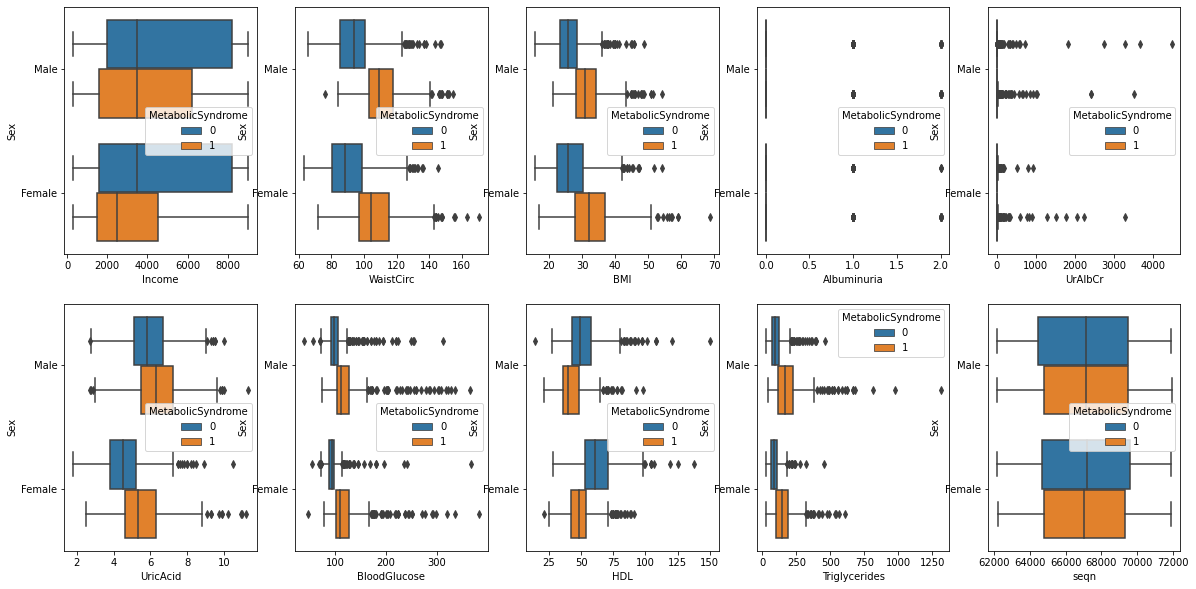

In [74]:
fig, ax = plt.subplots(2, 5, figsize=(20, 10))

sns.boxplot(data = df, x ='Income', y='Sex', hue = 'MetabolicSyndrome',ax=ax[0,0])
sns.boxplot(data = df, x ='WaistCirc', y='Sex', hue = 'MetabolicSyndrome',ax=ax[0,1])
sns.boxplot(data = df, x ='BMI', y='Sex', hue = 'MetabolicSyndrome',ax=ax[0,2])
sns.boxplot(data = df, x ='Albuminuria', y='Sex', hue = 'MetabolicSyndrome',ax=ax[0,3])
sns.boxplot(data = df, x ='UrAlbCr', y='Sex', hue = 'MetabolicSyndrome',ax=ax[0,4])
sns.boxplot(data = df, x ='UricAcid', y='Sex', hue = 'MetabolicSyndrome',ax=ax[1,0])
sns.boxplot(data = df, x ='BloodGlucose', y='Sex', hue = 'MetabolicSyndrome',ax=ax[1,1])
sns.boxplot(data = df, x ='HDL', y='Sex', hue = 'MetabolicSyndrome',ax=ax[1,2])
sns.boxplot(data = df, x ='Triglycerides', y='Sex', hue = 'MetabolicSyndrome',ax=ax[1,3])
sns.boxplot(data = df, x ='seqn', y='Sex', hue = 'MetabolicSyndrome',ax=ax[1,4])

plt.show()

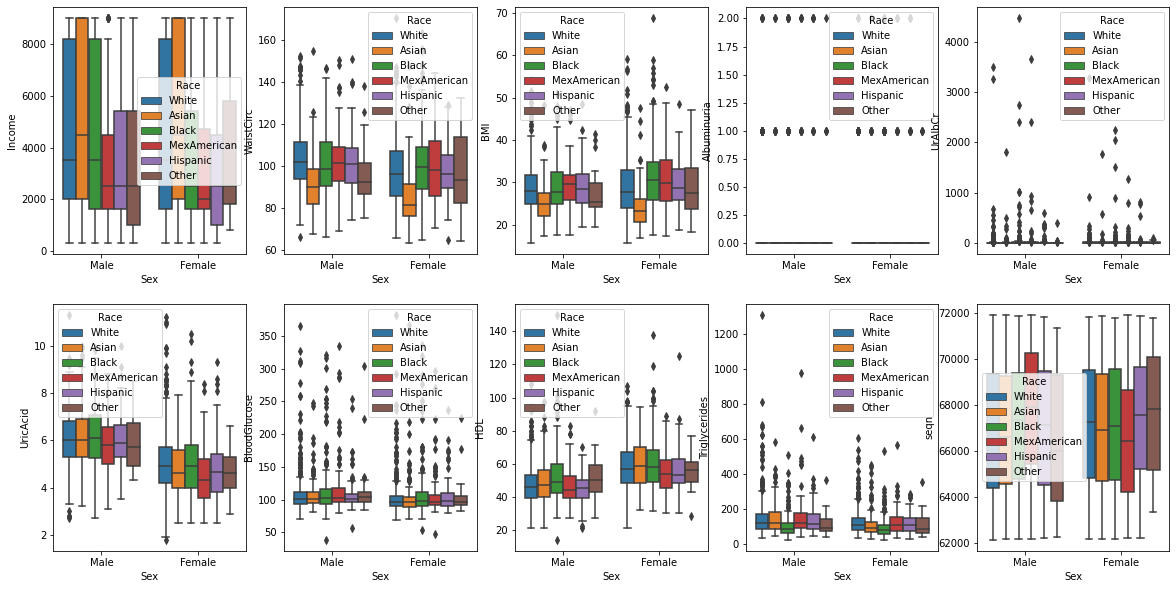

In [75]:
fig, ax = plt.subplots(2, 5, figsize=(20, 10))

sns.boxplot(data = df, x ='Sex', y='Income', hue = 'Race',ax=ax[0,0])
sns.boxplot(data = df, x ='Sex', y='WaistCirc', hue = 'Race',ax=ax[0,1])
sns.boxplot(data = df, x ='Sex', y='BMI', hue = 'Race',ax=ax[0,2])
sns.boxplot(data = df, x ='Sex', y='Albuminuria', hue = 'Race',ax=ax[0,3])
sns.boxplot(data = df, x ='Sex', y='UrAlbCr', hue = 'Race',ax=ax[0,4])
sns.boxplot(data = df, x ='Sex', y='UricAcid', hue = 'Race',ax=ax[1,0])
sns.boxplot(data = df, x ='Sex', y='BloodGlucose', hue = 'Race',ax=ax[1,1])
sns.boxplot(data = df, x ='Sex', y='HDL', hue = 'Race',ax=ax[1,2])
sns.boxplot(data = df, x ='Sex', y='Triglycerides', hue = 'Race',ax=ax[1,3])
sns.boxplot(data = df, x ='Sex', y='seqn', hue = 'Race',ax=ax[1,4])

plt.show()

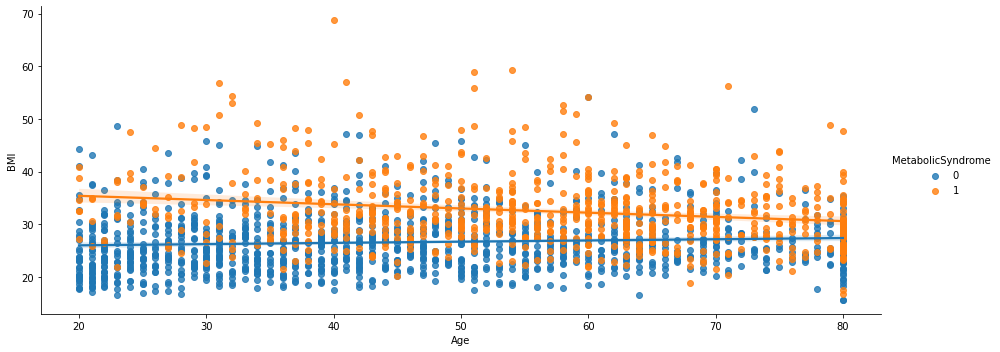

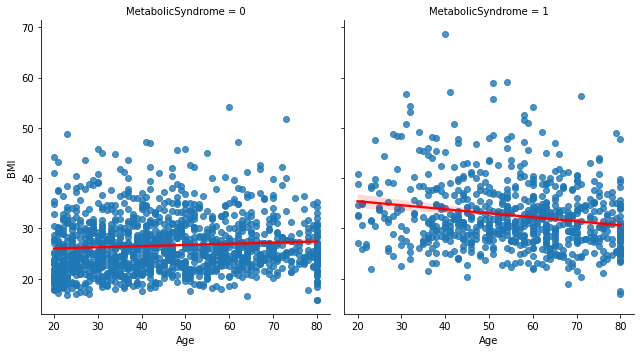

In [76]:
sns.lmplot(data=df, x='Age', y='BMI', hue='MetabolicSyndrome', aspect=2.5)
sns.lmplot(data=df, x='Age', y='BMI', col ='MetabolicSyndrome', aspect=0.9, line_kws={'color': 'red'})

plt.show()

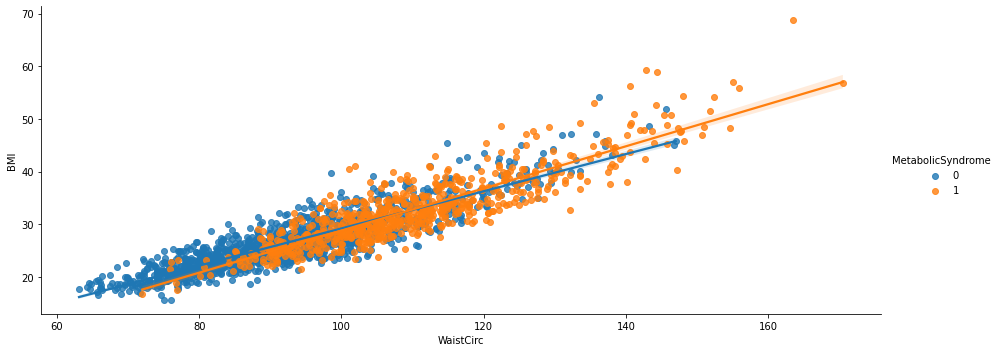

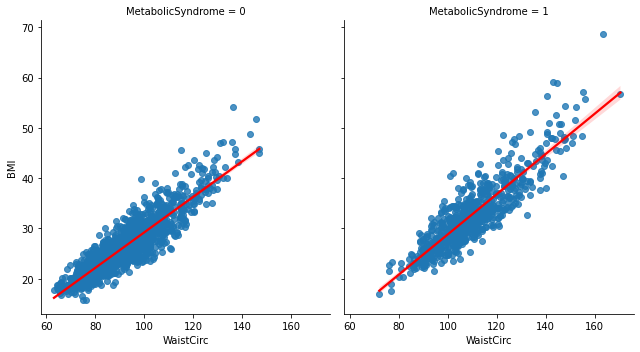

In [77]:
sns.lmplot(data=df, x='WaistCirc', y='BMI', hue='MetabolicSyndrome', aspect=2.5)
sns.lmplot(data=df, x='WaistCirc', y='BMI', col ='MetabolicSyndrome', aspect=0.9, line_kws={'color': 'red'})

plt.show()

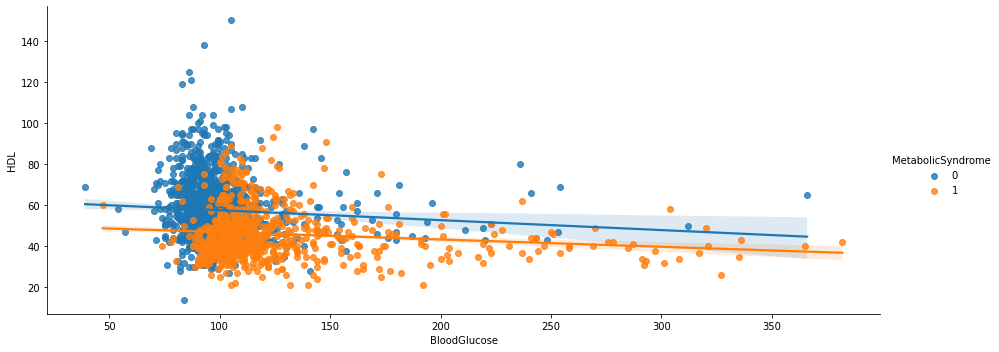

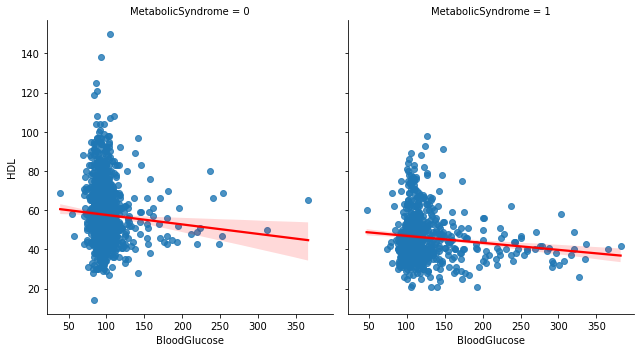

In [78]:
sns.lmplot(data=df, x='BloodGlucose', y='HDL', hue='MetabolicSyndrome', aspect=2.5)
sns.lmplot(data=df, x='BloodGlucose', y='HDL', col ='MetabolicSyndrome', aspect=0.9, line_kws={'color': 'red'})

plt.show()

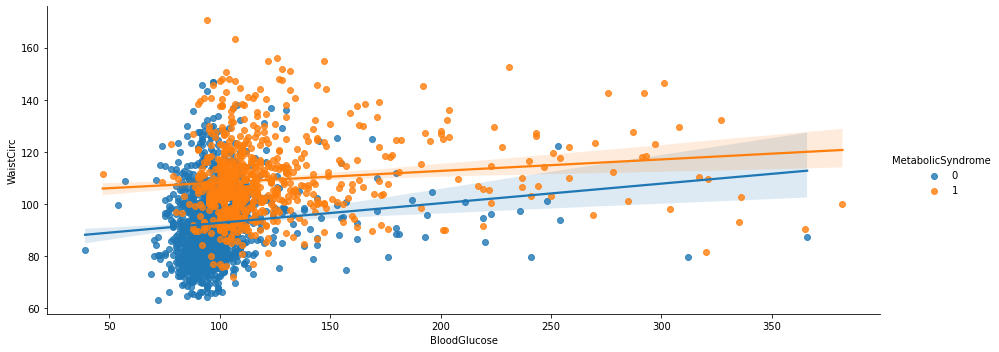

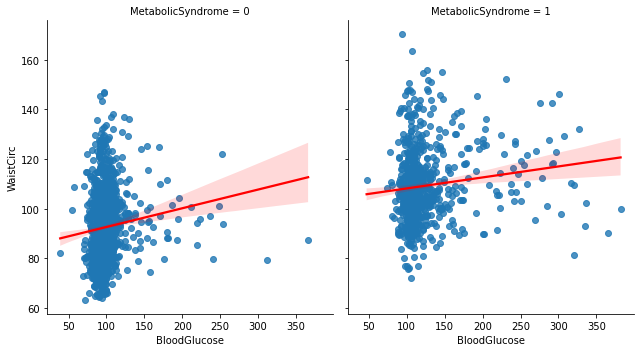

In [79]:
sns.lmplot(data=df, x='BloodGlucose', y='WaistCirc', hue='MetabolicSyndrome', aspect=2.5)
sns.lmplot(data=df, x='BloodGlucose', y='WaistCirc', col ='MetabolicSyndrome', aspect=0.9, line_kws={'color': 'red'})

plt.show()

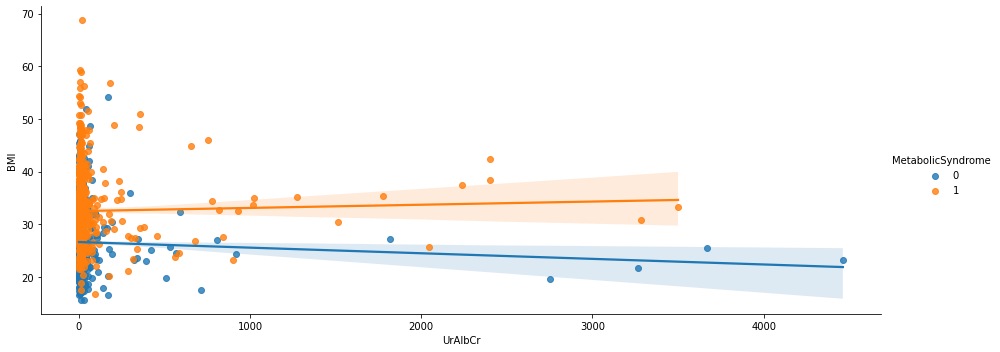

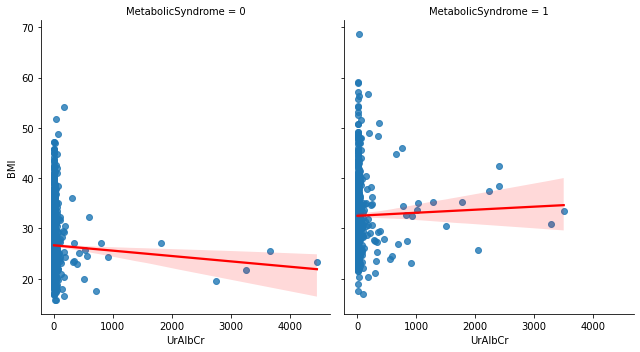

In [80]:
sns.lmplot(data=df, x='UrAlbCr', y='BMI', hue='MetabolicSyndrome', aspect=2.5)
sns.lmplot(data=df, x='UrAlbCr', y='BMI', col ='MetabolicSyndrome', aspect=0.9, line_kws={'color': 'red'})

plt.show()

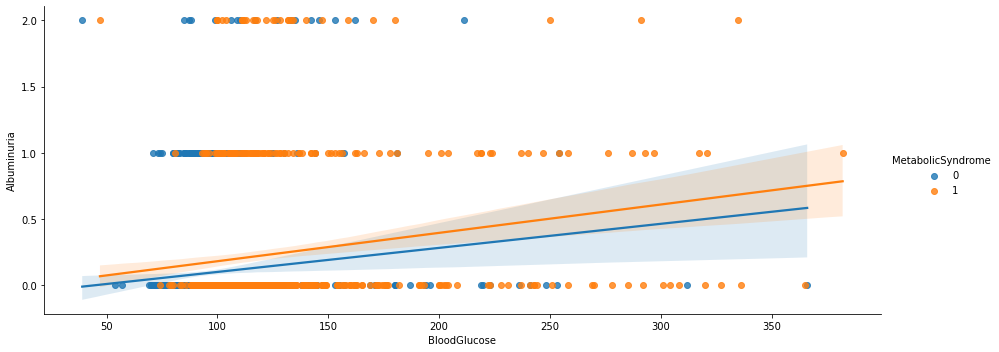

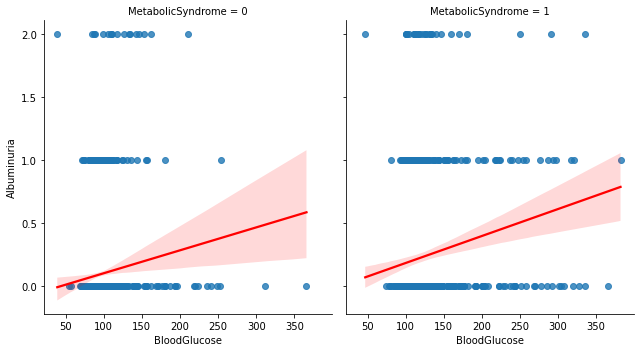

In [81]:
sns.lmplot(data=df, x='BloodGlucose', y='Albuminuria', hue='MetabolicSyndrome', aspect=2.5)
sns.lmplot(data=df, x='BloodGlucose', y='Albuminuria', col ='MetabolicSyndrome', aspect=0.9, line_kws={'color': 'red'})

plt.show()

### Encoder

In [82]:
lb = LabelEncoder()

df['Race'] = lb.fit_transform(df['Race'])
df['Marital'] = lb.fit_transform(df['Marital'])
df['Sex'] = lb.fit_transform(df['Sex'])

df = df.drop(['seqn','Income'],axis=1)

df.head(1)

,Age,Sex,Marital,Race,WaistCirc,BMI,Albuminuria,UrAlbCr,UricAcid,BloodGlucose,HDL,Triglycerides,MetabolicSyndrome
0,22,1,3,5,81.0,23.3,0,3.88,4.9,92,41,84,0


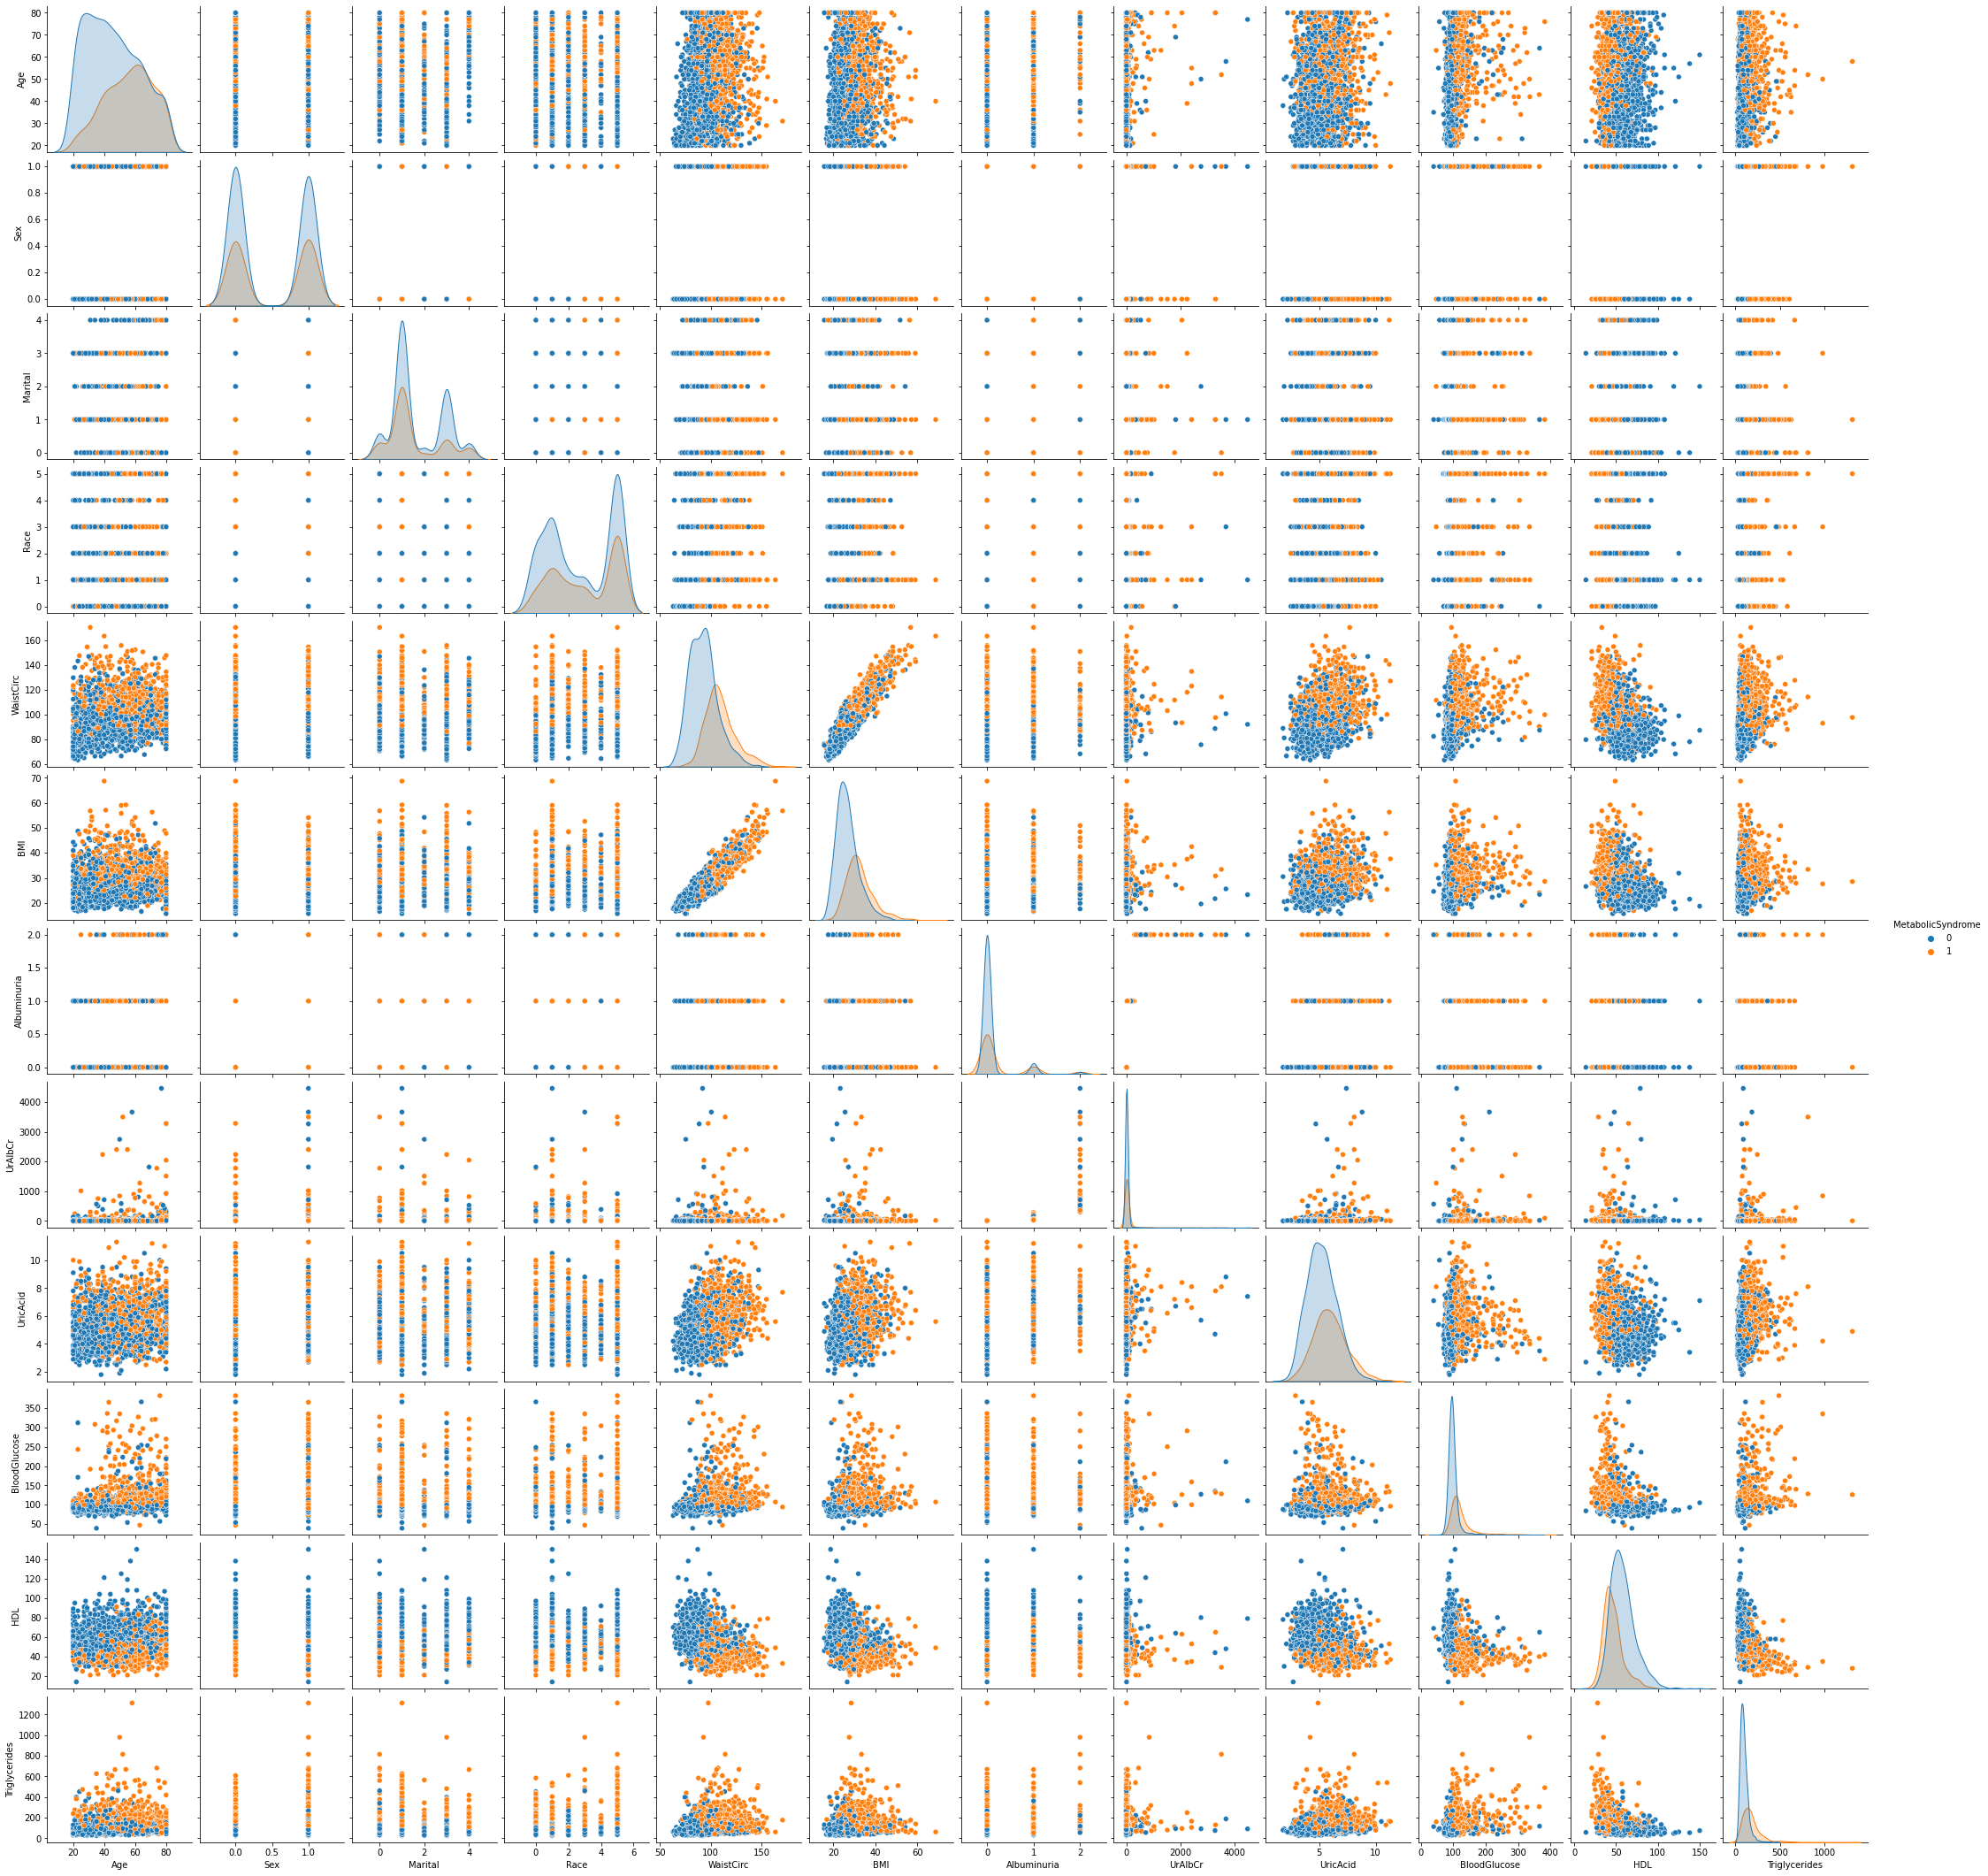

In [83]:
sns.pairplot(df, hue ='MetabolicSyndrome')
plt.show()

### Modeling and Evaluation

In [85]:
X_M = df.drop('MetabolicSyndrome', axis = 1)
Y_M = df['MetabolicSyndrome']
scaler = MinMaxScaler()
x = scaler.fit_transform(X_M)

### Train Test Split

In [97]:
X_train, X_test, y_train, y_test = train_test_split(x, Y_M, test_size=0.25, random_state=42)

### Logistic Regression

In [98]:
logistic_model = LogisticRegression(random_state=42)
logistic_model.fit(X_train, y_train)
logistic_model.score(X_train, y_train)
model_pred_L = logistic_model.predict(X_test)

print(classification_report(y_test, model_pred_L))
print("accuracy: ",accuracy_score(y_test, model_pred_L))
print("mean_absolute_error: ",mean_absolute_error(y_test, model_pred_L))
print("mean_squared_error: ",mean_squared_error(y_test, model_pred_L))

              precision    recall  f1-score   support

           0       0.83      0.88      0.85       322
           1       0.76      0.67      0.71       181

    accuracy                           0.81       503
   macro avg       0.79      0.78      0.78       503
weighted avg       0.80      0.81      0.80       503

accuracy:  0.805168986083499
mean_absolute_error:  0.19483101391650098
mean_squared_error:  0.19483101391650098


### Random Forest Classifier

In [99]:
random_forest_model = RandomForestClassifier(random_state=42)
random_forest_model.fit(X_train, y_train)
random_forest_model.score(X_train, y_train)
model_pred_R = random_forest_model.predict(X_test)

print(classification_report(y_test, model_pred_R))
print("accuracy: ",accuracy_score(y_test, model_pred_R))
print("mean_absolute_error: ",mean_absolute_error(y_test, model_pred_R))
print("mean_squared_error: ",mean_squared_error(y_test, model_pred_R))

              precision    recall  f1-score   support

           0       0.89      0.89      0.89       322
           1       0.81      0.81      0.81       181

    accuracy                           0.86       503
   macro avg       0.85      0.85      0.85       503
weighted avg       0.86      0.86      0.86       503

accuracy:  0.8628230616302187
mean_absolute_error:  0.13717693836978131
mean_squared_error:  0.13717693836978131


### Decision Tree

In [100]:
decision_tree_model = DecisionTreeClassifier(random_state=42)
decision_tree_model.fit(X_train, y_train)
decision_tree_model.score(X_train, y_train)
model_pred_T = decision_tree_model.predict(X_test)

print(classification_report(y_test, model_pred_T))
print("accuracy: ",accuracy_score(y_test, model_pred_T))
print("mean_absolute_error: ",mean_absolute_error(y_test, model_pred_T))
print("mean_squared_error: ",mean_squared_error(y_test, model_pred_T))

              precision    recall  f1-score   support

           0       0.87      0.88      0.87       322
           1       0.78      0.76      0.77       181

    accuracy                           0.84       503
   macro avg       0.82      0.82      0.82       503
weighted avg       0.84      0.84      0.84       503

accuracy:  0.8369781312127237
mean_absolute_error:  0.16302186878727634
mean_squared_error:  0.16302186878727634


### SVC

In [101]:
model_SVC = SVC(kernel = 'rbf' ,random_state = 42)
model_SVC.fit(X_train, y_train)
model_SVC.score(X_train, y_train)
model_SVC_Pred = model_SVC.predict(X_test)

print(classification_report(y_test, model_SVC_Pred))
print("accuracy: ",accuracy_score(y_test, model_SVC_Pred))
print("mean_absolute_error: ",mean_absolute_error(y_test, model_SVC_Pred))
print("mean_squared_error: ",mean_squared_error(y_test, model_SVC_Pred))

              precision    recall  f1-score   support

           0       0.82      0.89      0.85       322
           1       0.77      0.66      0.71       181

    accuracy                           0.81       503
   macro avg       0.79      0.77      0.78       503
weighted avg       0.80      0.81      0.80       503

accuracy:  0.805168986083499
mean_absolute_error:  0.19483101391650098
mean_squared_error:  0.19483101391650098


### KNeighbors Classifier

In [102]:
model_NEG = KNeighborsClassifier(n_neighbors=2)
model_NEG.fit(X_train, y_train)
model_NEG.score(X_train, y_train)
model_NEG_Pred = model_NEG.predict(X_test)

print(classification_report(y_test, model_NEG_Pred))
print("accuracy: ",accuracy_score(y_test, model_NEG_Pred))
print("mean_absolute_error: ",mean_absolute_error(y_test, model_NEG_Pred))
print("mean_squared_error: ",mean_squared_error(y_test, model_NEG_Pred))

              precision    recall  f1-score   support

           0       0.72      0.90      0.80       322
           1       0.68      0.38      0.49       181

    accuracy                           0.71       503
   macro avg       0.70      0.64      0.64       503
weighted avg       0.70      0.71      0.69       503

accuracy:  0.7117296222664016
mean_absolute_error:  0.2882703777335984
mean_squared_error:  0.2882703777335984


0    322
1    181
Name: MetabolicSyndrome, dtype: int64


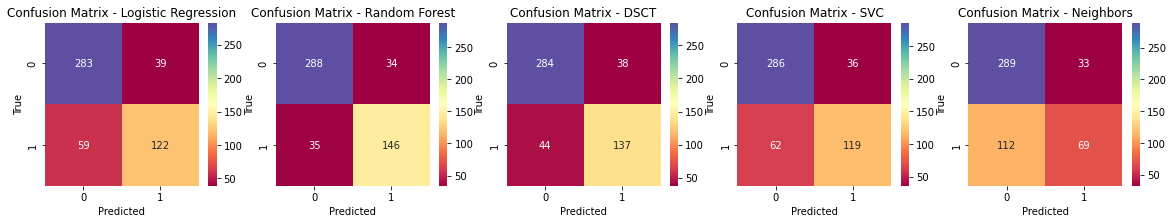

In [103]:
RLOG = confusion_matrix(y_test, model_pred_L)
RMFC = confusion_matrix(y_test, model_pred_R)
DSCT = confusion_matrix(y_test, model_pred_T)
SVC_ = confusion_matrix(y_test, model_SVC_Pred)
NEG = confusion_matrix(y_test, model_NEG_Pred)

fig, axes = plt.subplots(1, 5, figsize=(20, 3))

sns.heatmap(RLOG, annot=True, cmap='Spectral', fmt='g', ax=axes[0])
axes[0].set_title('Confusion Matrix - Logistic Regression')
axes[0].set_xlabel('Predicted')
axes[0].set_ylabel('True')

sns.heatmap(RMFC, annot=True, cmap='Spectral', fmt='g', ax=axes[1])
axes[1].set_title('Confusion Matrix - Random Forest')
axes[1].set_xlabel('Predicted')
axes[1].set_ylabel('True')

sns.heatmap(DSCT, annot=True, cmap='Spectral', fmt='g', ax=axes[2])
axes[2].set_title('Confusion Matrix - DSCT')
axes[2].set_xlabel('Predicted')
axes[2].set_ylabel('True')

sns.heatmap(SVC_, annot=True, cmap='Spectral', fmt='g', ax=axes[3])
axes[3].set_title('Confusion Matrix - SVC')
axes[3].set_xlabel('Predicted')
axes[3].set_ylabel('True')

sns.heatmap(NEG, annot=True, cmap='Spectral', fmt='g', ax=axes[4])
axes[4].set_title('Confusion Matrix - Neighbors')
axes[4].set_xlabel('Predicted')
axes[4].set_ylabel('True')

print(y_test.value_counts())
plt.show()

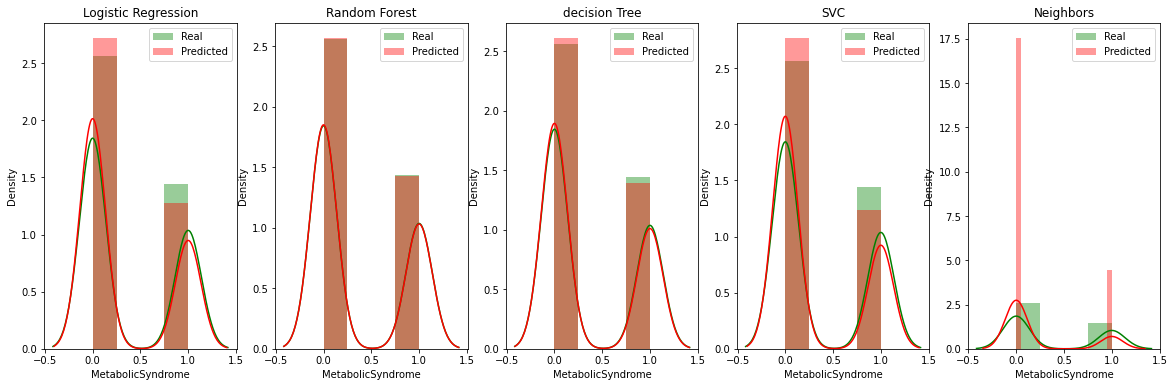

In [104]:
fig, ax = plt.subplots(1, 5, figsize=(20, 6))

sns.distplot(y_test, label='Real', ax=ax[0], color = 'Green')
sns.distplot(model_pred_L, label='Predicted', ax=ax[0],  color = 'red')

sns.distplot(y_test, label='Real', ax=ax[1], color = 'Green')
sns.distplot(model_pred_R, label='Predicted', ax=ax[1], color = 'red')

sns.distplot(y_test, label='Real', ax=ax[2], color = 'Green')
sns.distplot(model_pred_T, label='Predicted', ax=ax[2], color = 'red')

sns.distplot(y_test, label='Real', ax=ax[3], color = 'Green')
sns.distplot(model_SVC_Pred, label='Predicted', ax=ax[3], color = 'red')

sns.distplot(y_test, label='Real', ax=ax[4], color = 'Green')
sns.distplot(model_NEG_Pred, label='Predicted', ax=ax[4], color = 'red')


ax[0].set_title('Logistic Regression')
ax[1].set_title('Random Forest')
ax[2].set_title('decision Tree')
ax[3].set_title('SVC')
ax[4].set_title('Neighbors')

ax[0].legend()
ax[1].legend()
ax[2].legend()
ax[3].legend()
ax[4].legend()
plt.show()